# Analisando o bot

Este jupyter-notebook vai auxiliar na análise de um RASA bot.

## Instalação

### Configurando jupyter

In [1]:
import os
os.system('pip install -r intent-requirements.txt')

0

In [2]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

def pprint(o):
    # small helper to make dict dumps a bit prettier
    print(json.dumps(o, indent=2))

### Instalação do Rasa


In [3]:
import sys
python = sys.executable

# as well as install a language model:
!{python} -m spacy download pt;


    Linking successful
    /home/gabibs/.pyenv/versions/3.6.6/lib/python3.6/site-packages/pt_core_news_sm
    -->
    /home/gabibs/.pyenv/versions/3.6.6/lib/python3.6/site-packages/spacy/data/pt

    You can now load the model via spacy.load('pt')



Verificando versões:

In [4]:
import rasa_nlu
import spacy

print("rasa_nlu: {}".format(rasa_nlu))
print("Loading spaCy language model...")
print(spacy.load("pt")("Olá Mundo!"))

rasa_nlu: <module 'rasa_nlu' from '/home/gabibs/.pyenv/versions/3.6.6/lib/python3.6/site-packages/rasa_nlu/__init__.py'>
Loading spaCy language model...
Olá Mundo!


### Ferramentas adicionais

Atualize a instalação de acordo com seu sistema operacional

In [5]:
#!apt-get -qq install -y graphviz libgraphviz-dev pkg-config;
#!brew install graphviz;
#!yaourt -S graphviz;

## Adicionando nlu (natural language understanding)

Nesta parte o bot vai aprender a entender a linguagem

### Treinando o modelo do Rasa NLU

INFO:rasa_nlu.training_data.loading:Training data format of ../data/intents/curiosidades.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 168 (9 distinct intents)
	- Found intents: 'curiosidades_lei_rouanet_denuncia', 'curiosidades_deducao_imposto_de_renda_incentivador', 'curiosidades_lei_rouanet_arrecadamento', 'curiosidades_quantidade_projetos', 'curiosidades_receber_incetivo_de_parentes', 'curiosidades_lei_rouanet_elegibilidade', 'curiosidades_beneficios_incentivo_projetos_culturais', 'curiosidades_elegibilidade_de_empresa_para_beneficios', 'curiosidades_captacao_de_recursos'
	- entity examples: 0 (0 distinct entities)
	- found entities: 

INFO:rasa_nlu.training_data.loading:Training data format of ../data/intents/geral.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 229 (8 distinct intents)
	- Found intents: 'afirmar', 'duvida_sobre_contexto', 'afirmar_curiosidades', 'cumprimentar', 'o_que_eh',

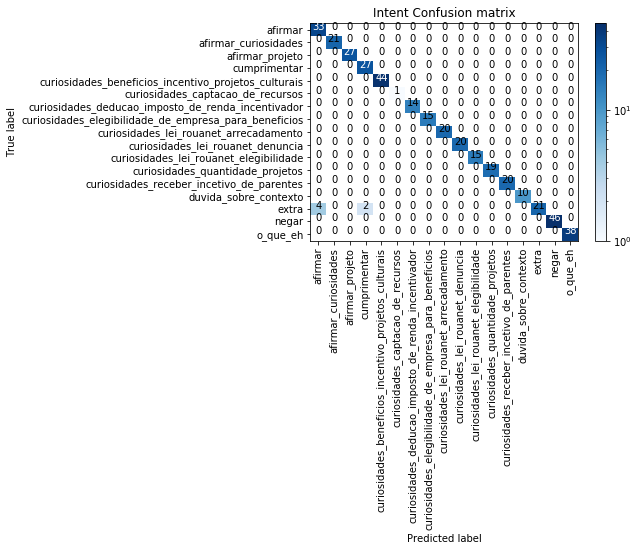

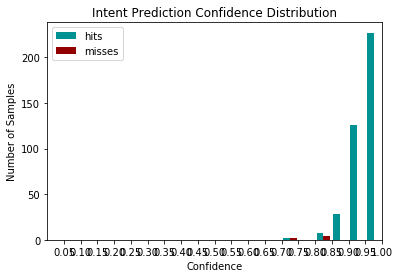

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  1.0
INFO:rasa_nlu.evaluate:Precision: 1.0
INFO:rasa_nlu.evaluate:Accuracy:  1.0
INFO:rasa_nlu.evaluate:Classification report: 
             precision    recall  f1-score   support

  no_entity       1.00      1.00      1.00      1755

avg / total       1.00      1.00      1.00      1755



In [6]:
import os

from rasa_nlu.training_data import load_data
from rasa_nlu.model import Trainer
from rasa_nlu import config


intents_directory = '../data/intents/'

intents = {}

for intent_file in os.listdir(intents_directory):
    intent_file_path = os.path.join(intents_directory, intent_file)

    intents[intent_file] = {}

    intent_list = []
    intent_name = None

    with open(intent_file_path) as f:
        lines = f.readlines()

        for line in lines:
            line = line.strip()

            if line.startswith('##'):
                if intent_name is not None:
                    intents[intent_file][intent_name] = intent_list
                intent_name = line.replace('## intent:', '') 
                intent_list = []

            elif line.startswith('- '):
                intent_list.append(line.replace('- ', ''))


# loading the nlu training samples
training_data = load_data(intents_directory)

# trainer to educate our pipeline
trainer = Trainer(config.load("../config.yml"))

# train the model!
interpreter = trainer.train(training_data)

# store it for future use
model_directory = trainer.persist("./models/nlu", fixed_model_name="current")

from rasa_nlu.evaluate import run_evaluation
run_evaluation('../data/intents/', model_directory)

### Avaliação do modelo de NLU treinado

`Caso queira testar mensagens específicas mande a mensagem na célula seguinte`

In [7]:
pprint(interpreter.parse("sim"))

{
  "intent": {
    "name": "afirmar",
    "confidence": 0.867855429649353
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "afirmar",
      "confidence": 0.867855429649353
    },
    {
      "name": "extra",
      "confidence": 0.37421897053718567
    },
    {
      "name": "afirmar_curiosidades",
      "confidence": 0.09712763130664825
    },
    {
      "name": "afirmar_projeto",
      "confidence": 0.09301888942718506
    },
    {
      "name": "duvida_sobre_contexto",
      "confidence": 0.04829699546098709
    },
    {
      "name": "cumprimentar",
      "confidence": 0.0
    },
    {
      "name": "curiosidades_receber_incetivo_de_parentes",
      "confidence": 0.0
    },
    {
      "name": "curiosidades_elegibilidade_de_empresa_para_beneficios",
      "confidence": 0.0
    },
    {
      "name": "curiosidades_lei_rouanet_elegibilidade",
      "confidence": 0.0
    },
    {
      "name": "curiosidades_captacao_de_recursos",
      "confidence": 0.0
    }
  ],
  "

### Avaliação de correlação das intents

INFO:tensorflow:Restoring parameters from /home/gabibs/Documentos/lappis/tais/rouana/lab/./models/nlu/default/current/intent_classifier_tensorflow_embedding.ckpt
INFO:rasa_nlu.training_data.loading:Training data format of ../data/intents/curiosidades.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 168 (9 distinct intents)
	- Found intents: 'curiosidades_lei_rouanet_denuncia', 'curiosidades_deducao_imposto_de_renda_incentivador', 'curiosidades_lei_rouanet_arrecadamento', 'curiosidades_quantidade_projetos', 'curiosidades_receber_incetivo_de_parentes', 'curiosidades_lei_rouanet_elegibilidade', 'curiosidades_beneficios_incentivo_projetos_culturais', 'curiosidades_elegibilidade_de_empresa_para_beneficios', 'curiosidades_captacao_de_recursos'
	- entity examples: 0 (0 distinct entities)
	- found entities: 

INFO:rasa_nlu.training_data.loading:Training data format of ../data/intents/geral.md is md
INFO:rasa_nlu.training_data.training_data:Training d

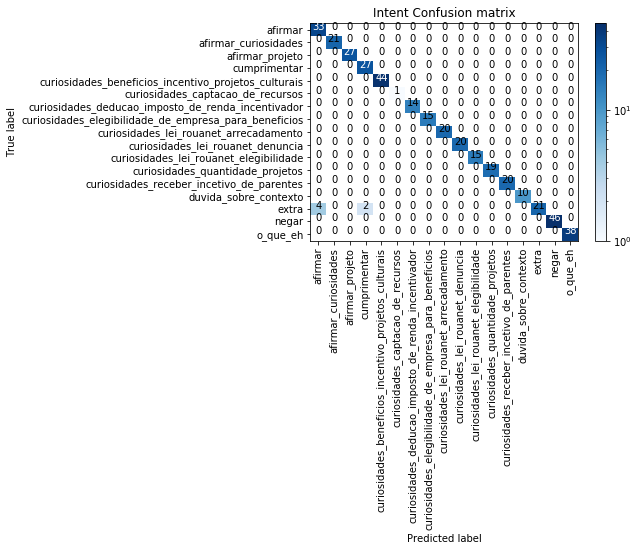

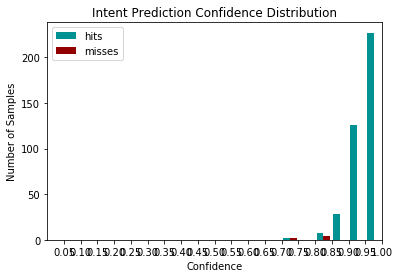

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  1.0
INFO:rasa_nlu.evaluate:Precision: 1.0
INFO:rasa_nlu.evaluate:Accuracy:  1.0
INFO:rasa_nlu.evaluate:Classification report: 
             precision    recall  f1-score   support

  no_entity       1.00      1.00      1.00      1755

avg / total       1.00      1.00      1.00      1755



In [8]:
from rasa_nlu.evaluate import run_evaluation
run_evaluation('../data/intents/', model_directory)